<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_18_Exponentially_Weighted_Moving_Average_using_python/Lecture_18_Exponentially_Weighted_Moving_Average_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exponentially Weighted Moving Average**

In [29]:
# Import necessary libraries for data manipulation, numerical operations, and plotting.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [30]:
# Load the dataset into a pandas DataFrame and display the first few rows.

df = pd.read_csv('/content/DailyDelhiClimateTest.csv')
df.head()


,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [31]:
# Select only the 'date' and 'meantemp' columns from the DataFrame.

df = df[['date','meantemp']]
df.head()


,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


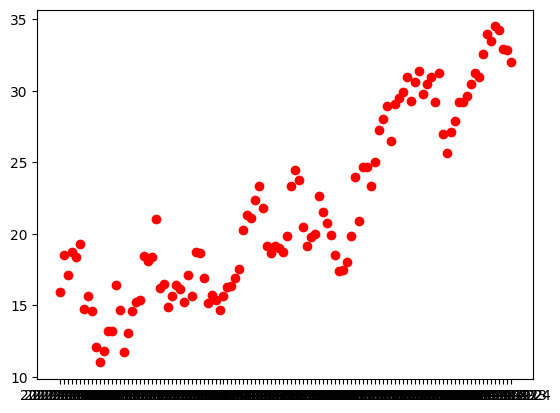

In [32]:
# Create a scatter plot of the original 'meantemp' data against the 'date'.

plt.scatter(df['date'],df['meantemp'],color='red')


In [33]:
# Calculate the Exponentially Weighted Moving Average (EWMA) for 'meantemp' with alpha=0.9 and display the result.

x1 = df['meantemp'].ewm(alpha=0.9).mean()
x1


,meantemp
0,15.913043
1,18.264822
2,17.225443
3,18.552677
4,18.405266
...,...
109,34.403401
110,34.265340
111,33.036534
112,32.891153


In [34]:
# Add the calculated EWMA (with alpha=0.9) as a new column named 'ewma' to the DataFrame and display the first few rows.

df['ewma'] = x1
df.head()


,date,meantemp,ewma
0,2017-01-01,15.913043,15.913043
1,2017-01-02,18.500000,18.264822
2,2017-01-03,17.111111,17.225443
3,2017-01-04,18.700000,18.552677
4,2017-01-05,18.388889,18.405266


In [35]:
# Calculate EWMA for different alpha values
# Calculate EWMA for 'meantemp' with alpha values of 0.9, 0.5, and 0.1.

x1 = df['meantemp'].ewm(alpha=0.9).mean()
x2 = df['meantemp'].ewm(alpha=0.5).mean()
x3 = df['meantemp'].ewm(alpha=0.1).mean()


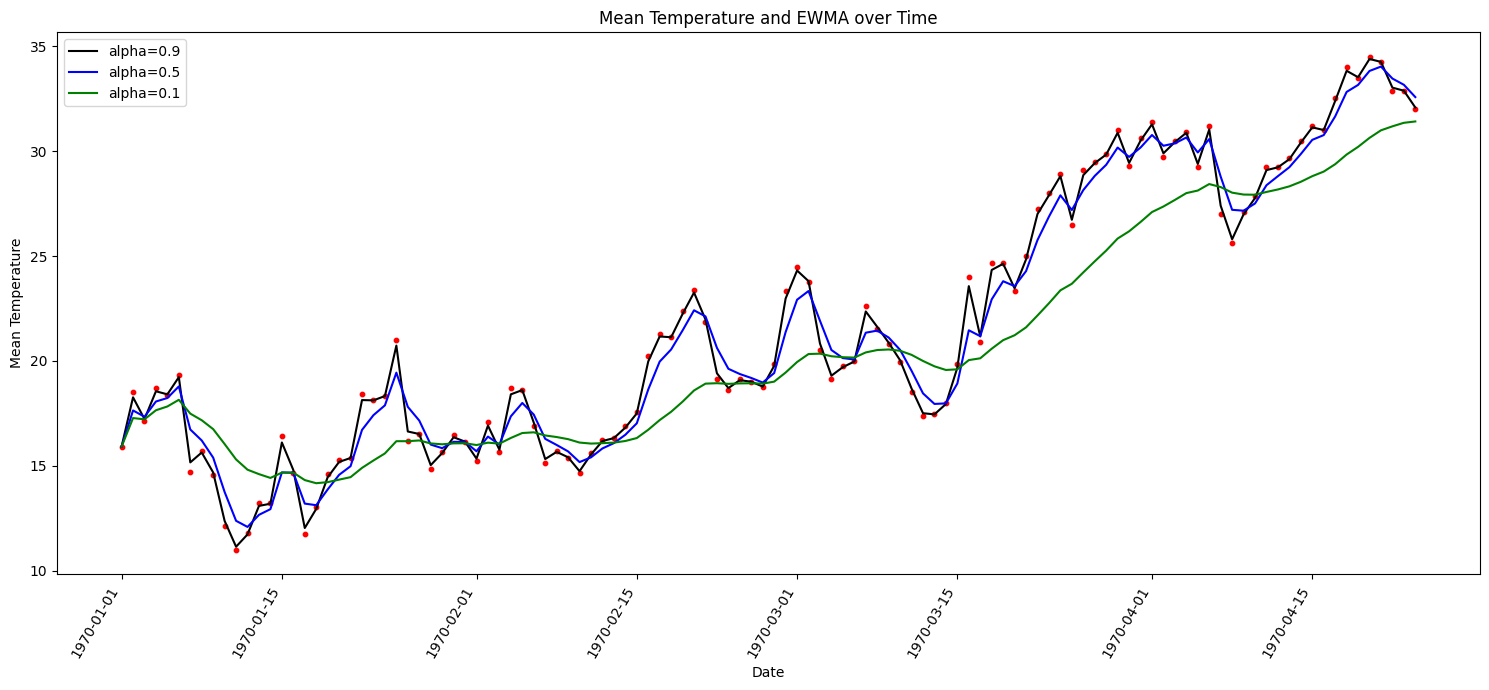

In [36]:
# Plot the original data as scatter points and the EWMA lines for different alpha values.
# The code also formats the x-axis to display dates clearly and adds labels, a title, and a legend.

import matplotlib.dates as mdates

# Plot the original data and EWMA lines
plt.figure(figsize=(15, 7))
plt.scatter(df['date'],df['meantemp'],color='red', s=10)
plt.plot(df['date'],x1,color='black',label='alpha=0.9')
plt.plot(df['date'],x2,color='blue',label='alpha=0.5')
plt.plot(df['date'],x3,color='green',label='alpha=0.1')
plt.title('Mean Temperature and EWMA over Time')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')

# Convert 'date' column to datetime objects for proper plotting
df['date'] = pd.to_datetime(df['date'])

# Format the x-axis to show dates clearly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xticks(rotation=60, ha='right', fontsize=10) # Adjust fontsize to 10 for better visibility

plt.legend()
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()
